<a href="https://colab.research.google.com/github/YonBoySc/Project_houses_ml/blob/main/Project_houses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Предварительные вещи**

In [ ]:
!pip install basemap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 864 kB 25.6 MB/s 
     |████████████████████████████████| 46 kB 4.8 MB/s 
     |████████████████████████████████| 6.3 MB 36.2 MB/s 
     |████████████████████████████████| 30.5 MB 78.8 MB/s 


In [ ]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.8 MB 1.5 MB/s 


In [ ]:
%pip install geopy
%pip install nominatim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for nominatim: filename=nominatim-0.1-py3-none-any.whl size=2365 sha256=f3ec17e4a84cda937875bb430cd5593f762a06bd6b70673929f4c01696de1593
  Stored in directory: /root/.cache/pip/wheels/37/00/9e/d904c390bfb174830ad3dcfd62af5544cee7d88bed4f8acedd
Successfully built nominatim


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# **Инициализация датасета**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')
df

,price,date,time,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
0,6050000,2018-02-19,20:00:21,59.805808,30.376141,2661,1,8,10,3,82.6,10.8,1
1,8650000,2018-02-27,12:04:54,55.683807,37.297405,81,3,5,24,2,69.1,12.0,1
2,4000000,2018-02-28,15:44:00,56.295250,44.061637,2871,1,5,9,3,66.0,10.0,1
3,1850000,2018-03-01,11:24:52,44.996132,39.074783,2843,4,12,16,2,38.0,5.0,11
4,5450000,2018-03-01,17:42:43,55.918767,37.984642,81,3,13,14,2,60.0,10.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5477001,19739760,2021-05-01,20:13:58,55.804736,37.750898,3,1,8,17,4,93.2,13.8,11
5477002,12503160,2021-05-01,20:14:01,55.841415,37.489624,3,2,17,32,2,45.9,6.6,11
5477003,8800000,2021-05-01,20:14:04,56.283909,44.075408,2871,2,4,17,3,86.5,11.8,1
5477004,11831910,2021-05-01,20:14:12,55.804736,37.750898,3,1,8,33,2,52.1,18.9,11


In [ ]:
df.describe()

,price,geo_lat,geo_lon,region,building_type,level,levels,rooms,area,kitchen_area,object_type
count,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06,5.477006e+06
mean,4.422029e+06,5.403826e+01,5.324433e+01,4.307141e+03,1.948966e+00,6.214530e+00,1.139892e+01,1.726173e+00,5.391825e+01,1.062840e+01,3.945399e+00
std,2.150752e+07,4.622758e+00,2.074763e+01,3.308050e+03,1.038537e+00,4.957419e+00,6.535734e+00,1.082133e+00,3.335293e+01,9.792380e+00,4.558357e+00
min,-2.144967e+09,4.145906e+01,1.989020e+01,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,7.000000e-02,1.000000e-02,1.000000e+00
25%,1.950000e+06,5.337768e+01,3.777790e+01,2.661000e+03,1.000000e+00,2.000000e+00,5.000000e+00,1.000000e+00,3.800000e+01,7.000000e+00,1.000000e+00
50%,2.990000e+06,5.517139e+01,4.306774e+01,2.922000e+03,2.000000e+00,5.000000e+00,1.000000e+01,2.000000e+00,4.802000e+01,9.700000e+00,1.000000e+00
75%,4.802000e+06,5.622613e+01,6.564895e+01,6.171000e+03,3.000000e+00,9.000000e+00,1.600000e+01,2.000000e+00,6.313000e+01,1.270000e+01,1.100000e+01
max,2.147484e+09,7.198040e+01,1.625361e+02,6.188800e+04,5.000000e+00,3.900000e+01,3.900000e+01,1.000000e+01,7.856000e+03,9.999000e+03,1.100000e+01


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5477006 entries, 0 to 5477005
Data columns (total 13 columns):
 #   Column         Dtype  
---  ------         -----  
 0   price          int64  
 1   date           object 
 2   time           object 
 3   geo_lat        float64
 4   geo_lon        float64
 5   region         int64  
 6   building_type  int64  
 7   level          int64  
 8   levels         int64  
 9   rooms          int64  
 10  area           float64
 11  kitchen_area   float64
 12  object_type    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 543.2+ MB


In [ ]:
df["one_qmetr"]=df["price"]/df["area"]
df["coeff_level"]=df["level"]/df["levels"]

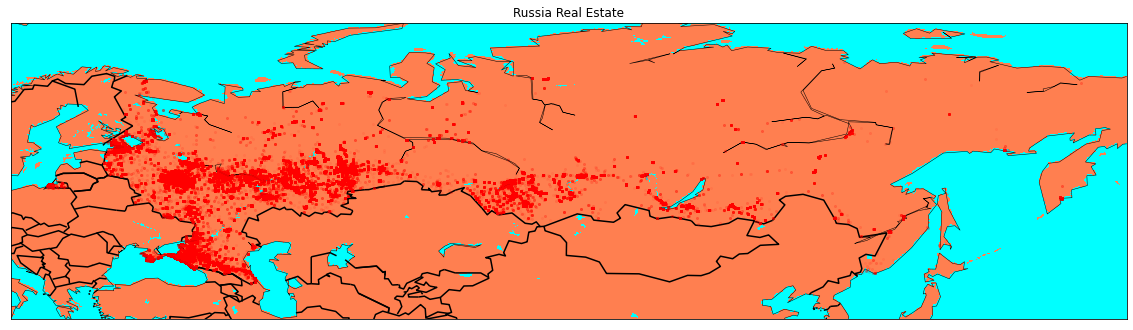

In [ ]:
lat = df['geo_lat'].values
lon = df['geo_lon'].values

plt.figure(figsize=(20,15))

m = Basemap(projection="mill"
            ,llcrnrlat=lat.min()-5
            ,urcrnrlat=lat.max()+5
            ,llcrnrlon=lon.min()-5
            ,urcrnrlon=lon.max()+5
            ,resolution='c'
            ,epsg=4269)
m.drawlsmask(land_color='coral',ocean_color='aqua',lakes=True)
m.drawcoastlines(linewidth=0.5)
m.drawcountries(linewidth=1.5) 


parallels = np.arange(0.,81,10.)
meridians = np.arange(0.,360.,10.)

m.plot(lon, lat, 'ro', markersize=2 ,alpha=.05)

plt.title("Russia Real Estate")
plt.show()


In [ ]:
df.drop(["date","time","geo_lat","geo_lon"],axis=1,inplace=True)
price_high=df[df['price']>=3.5000000e+08].index
df.drop(price_high,inplace=True)
rooms=df[df['rooms']<= 0].index
df.drop(rooms,inplace=True)
price=df[df['price'] <= 5000].index
df.drop(price,inplace=True)
df.drop(df[df['object_type']==1].index,inplace=True)

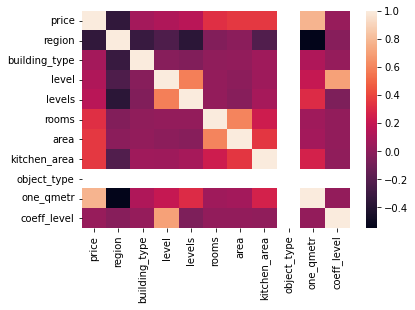

In [ ]:
sns.heatmap(df.corr())

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(['price'], axis=1)
y=df['price']
x_train,x_test,y_train,y_test=train_test_split(x, y,train_size=0.8,random_state=123)

## **Линейная регрессия**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

In [ ]:
model1=LinearRegression()
scores=[]
kf=KFold(n_splits=4,shuffle=True,random_state=71)
for tr_idx,va_idx in kf.split(x_train):
    tr_x,va_x=x_train.iloc[tr_idx],x_train.iloc[va_idx]
    tr_y,va_y=y_train.iloc[tr_idx],y_train.iloc[va_idx]
    
    model1.fit(tr_x,tr_y)
    va_pred1=model1.predict(va_x)
    score_rmse1=np.sqrt(mean_squared_error(va_y,va_pred1)).mean()
    score_mae1=mean_absolute_error(va_y,va_pred1).mean()
    score_r21=r2_score(va_y,va_pred1).mean()

print('rmse1:',score_rmse1)
print('mae1:',score_mae1)
print('R21:',score_r21)

rmse1: 3509364.8731129747
mae1: 1371651.352193236
R21: 0.7273845098730778


# **Теперь сделаем градиентный спуск из xgboost, catboost, lgbm**

### ***Модель LGBM***

In [ ]:
import lightgbm as lgb

In [ ]:
lgb_train = lgb.Dataset(x_train, y_train)
lgb_eval = lgb.Dataset(x_test, y_test)

In [ ]:
params={'metric': 'rmse '}

In [ ]:
gbm = lgb.train(params,
                lgb_train,
                valid_sets=lgb_eval,
                num_boost_round=5000,
                early_stopping_rounds=100,
                verbose_eval=100)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.30075e+06
[200]	valid_0's rmse: 1.27167e+06
[300]	valid_0's rmse: 1.25461e+06
[400]	valid_0's rmse: 1.25213e+06
[500]	valid_0's rmse: 1.24586e+06
[600]	valid_0's rmse: 1.2413e+06
[700]	valid_0's rmse: 1.23667e+06
[800]	valid_0's rmse: 1.23362e+06
[900]	valid_0's rmse: 1.2308e+06
[1000]	valid_0's rmse: 1.23132e+06
Early stopping, best iteration is:
[957]	valid_0's rmse: 1.22968e+06


In [ ]:
predicted = gbm.predict(x_test)

In [ ]:
def pred_map(pred_df):
    rmse = np.sqrt(mean_squared_error(pred_df['data'], pred_df['pred']))
    R2 = r2_score(pred_df['data'], pred_df['pred']) 
    plt.figure(figsize=(8,8))
    ax = plt.subplot(111)
    ax.scatter('data', 'pred', data=pred_df)
    ax.set_xlabel('Data Value', fontsize=15)
    ax.set_ylabel('Pred Value', fontsize=15)
    ax.set_xlim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    ax.set_ylim(pred_df.min().min()-0.1 , pred_df.max().max()+0.1)
    x = np.linspace(pred_df.min().min()-0.1, pred_df.max().max()+0.1, 2)
    y = x
    ax.plot(x,y,'r-')
    plt.text(0.1, 0.9, 'rmse = {}'.format(str(round(rmse, 5))), transform=ax.transAxes, fontsize=15)
    plt.text(0.1, 0.8, 'R2 = {}'.format(str(round(R2, 5))), transform=ax.transAxes, fontsize=15)

In [ ]:
df_prediction = pd.concat([y_test.reset_index(drop=True), pd.Series(predicted)], axis=1)
df_prediction.columns = ['data', 'pred']

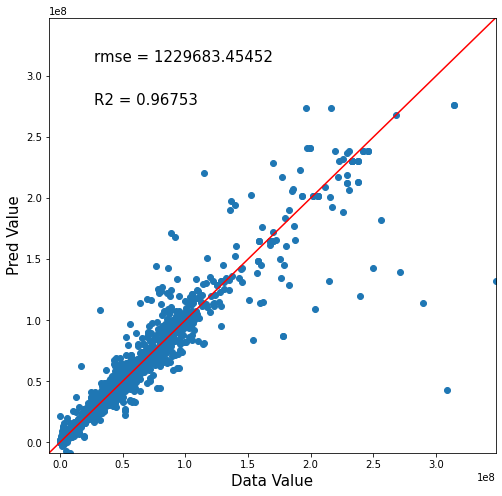

In [ ]:
pred_map(df_prediction)

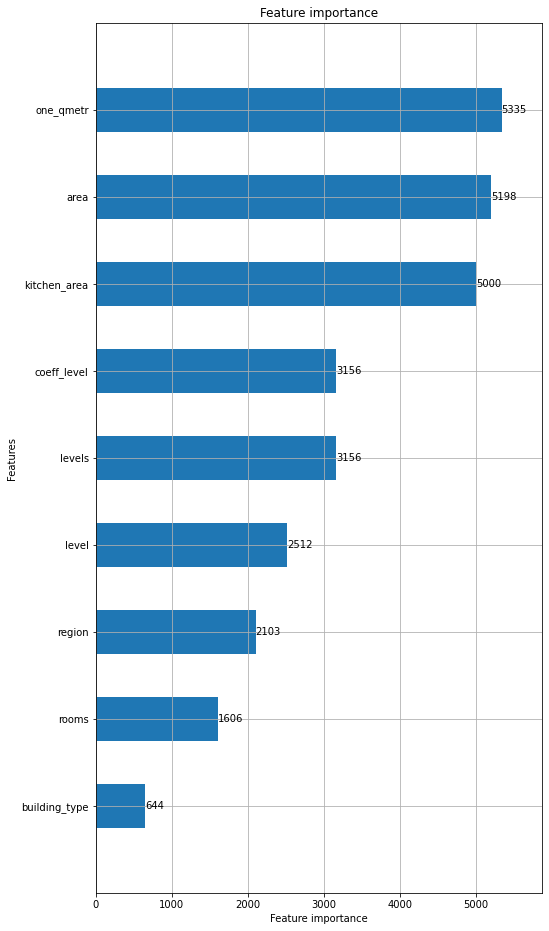

In [ ]:
lgb.plot_importance(gbm, height=0.5, figsize=(8,16))

## ***Модель XGBOOST***

In [ ]:
from xgboost import XGBRegressor
scores=[]
kf=KFold(n_splits=4,shuffle=True,random_state=71)
for train_index, test_index in kf.split(x, y):

    x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_xgb = XGBRegressor(objective='reg:squarederror')

    model_xgb.fit(x_train, y_train, eval_set=[(x_test, y_test)],
                  eval_metric='rmse', early_stopping_rounds=50,
                  verbose=0)
    va_pred=model_xgb.predict(x_test)

    scores.append(model_xgb.best_score)
    score_rmse=np.sqrt(mean_squared_error(y_test,va_pred)).mean()
    score_mae=mean_absolute_error(y_test,va_pred).mean()
    score_r2=r2_score(y_test,va_pred).mean()


print('XGBoost average RMSE:', np.mean(scores))
print('rmse:',score_rmse)
print('mae:',score_mae)
print('R2',score_r2)

XGBoost average RMSE: 425160.09375
rmse: 412042.64138667734
mae: 165713.5189108359
R2 0.9962956691417878


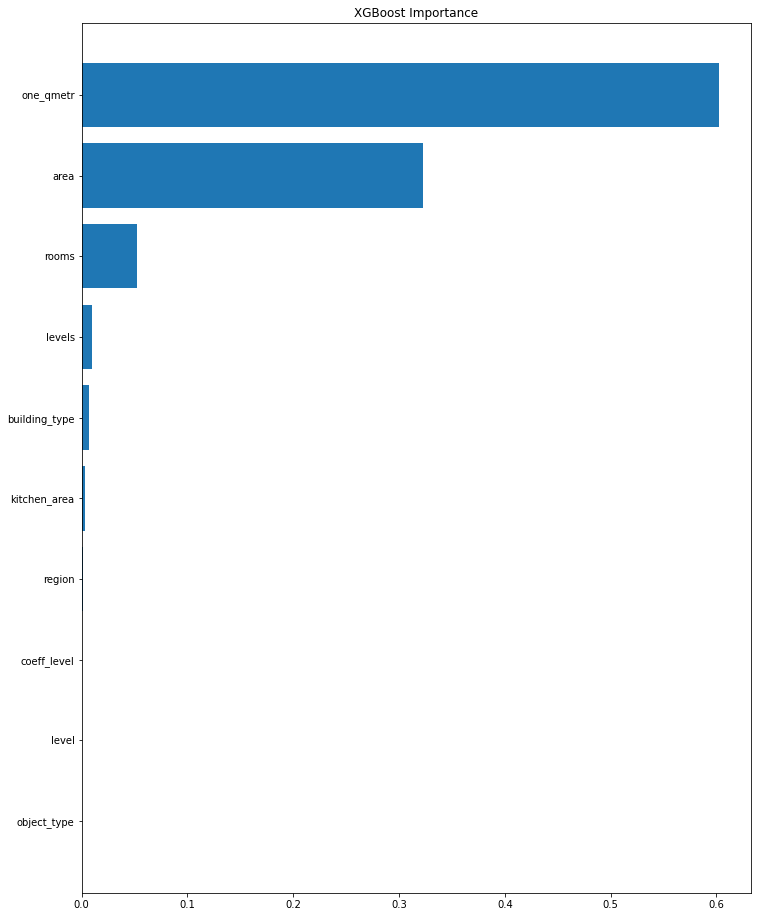

In [ ]:
importance = pd.DataFrame({
    'features': x.columns,
    'importance': model_xgb.feature_importances_
})
importance.sort_values(by='importance', inplace=True)

plt.figure(figsize=(12, 16))
plt.barh(importance['features'], importance['importance'])
plt.title('XGBoost Importance')
plt.show()

##  **Модель CatBoost**


In [ ]:
from catboost import CatBoostRegressor
for train_index, test_index in kf.split(x, y):

    x_train, x_test = x.iloc[train_index, :], x.iloc[test_index, :]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    model_cb = CatBoostRegressor(eval_metric='RMSE')
    model_cb.fit(x_train, y_train, eval_set=[(x_test, y_test)],
                 early_stopping_rounds=10, use_best_model=True,
                 verbose=0)
    va_pred1=model_cb.predict(x_test)

    scores.append(model_cb.best_score_['validation']['RMSE'])
    score_rmse2=np.sqrt(mean_squared_error(y_test,va_pred1)).mean()
    score_mae2=mean_absolute_error(y_test,va_pred1).mean()
    score_r22=r2_score(y_test,va_pred1).mean()
print('CatBoost average RMSE:', np.mean(scores))
print('rmse1:',score_rmse2)
print('mae1:',score_mae2)
print('R2:',score_r22)

CatBoost average RMSE: 892879.4114560522
rmse1: 1391811.49589374
mae1: 163554.71808834263
R2: 0.9577344735358475


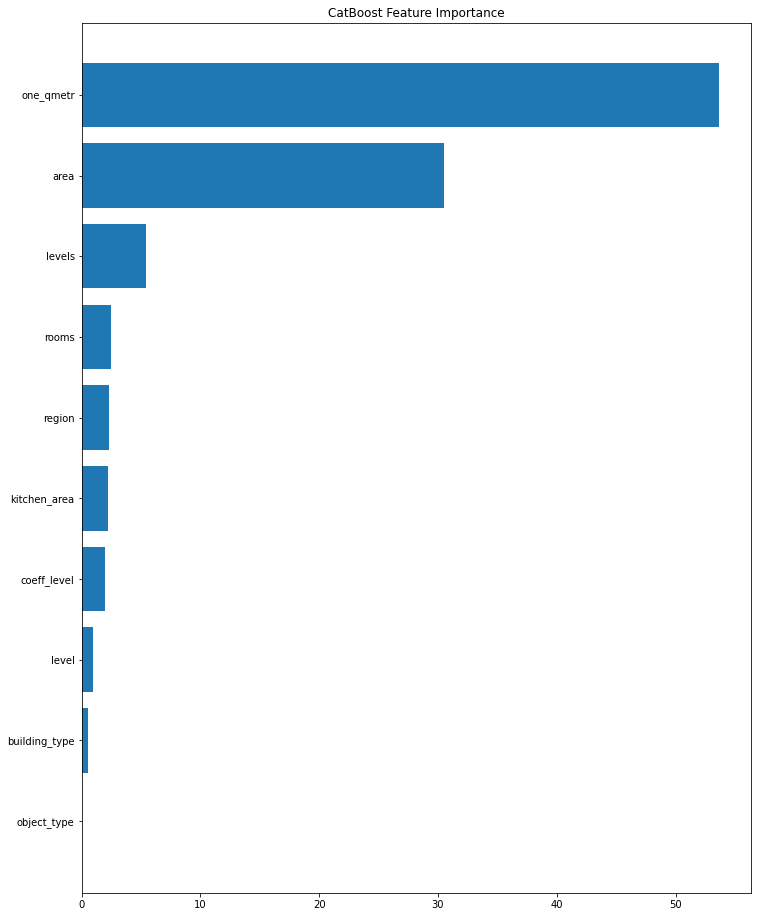

In [ ]:
importance = pd.DataFrame({
    'features': x.columns,
    'importance': model_cb.feature_importances_
})
importance.sort_values(by='importance', inplace=True)

plt.figure(figsize=(12, 16))
plt.barh(importance['features'], importance['importance'])
plt.title('CatBoost Feature Importance')
plt.show()

##  **Модель RandomTree**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

model = RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x, y,train_size=0.8,random_state=123)
model.fit(x_train,y_train)
pred=model.predict(x_test)
score_r21=r2_score(y_test,pred).mean()

print('R21:',score_r21)

R21: 0.9980682083334388


In [ ]:
[(est.get_depth(), est.tree_.max_depth) for est in model.estimators_]
model.n_estimators

100

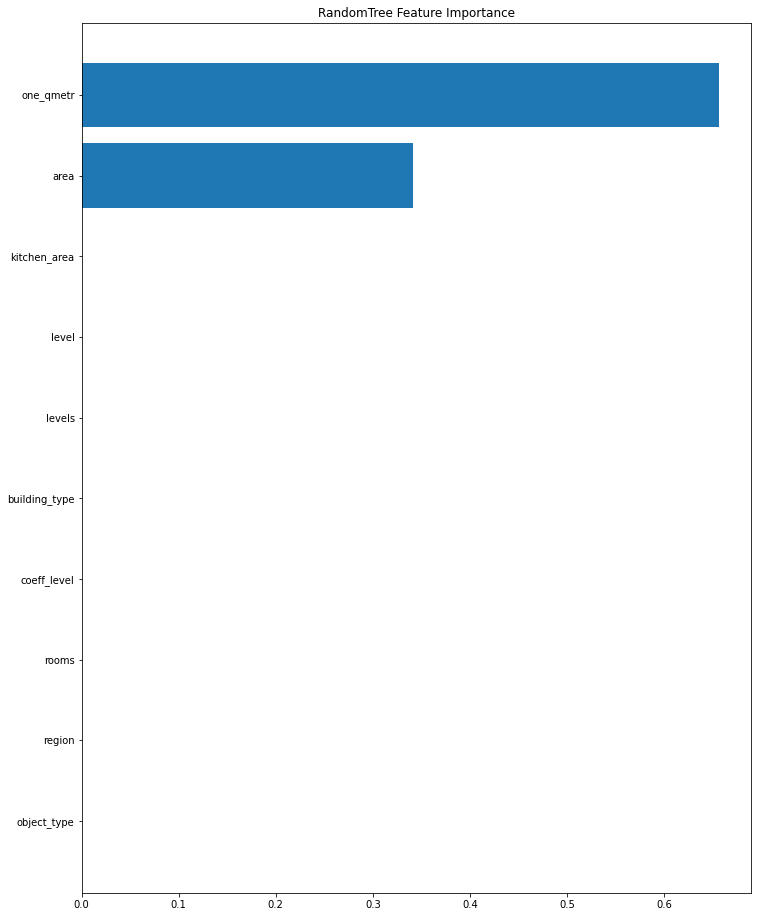

In [ ]:
importance = pd.DataFrame({
    'features': x.columns,
    'importance': model.feature_importances_
})
importance.sort_values(by='importance', inplace=True)

plt.figure(figsize=(12, 16))
plt.barh(importance['features'], importance['importance'])
plt.title('RandomTree Feature Importance')
plt.show()

**Также была реализована стратифицированная кросс-валидация,но была убрана,так как результаты не поменялись**


# **Создание нейросети**

Epoch 1/100
12/12 [==============================] - 1s 57ms/step - loss: 4925211.5000 - val_loss: 4935659.5000
Epoch 2/100
12/12 [==============================] - 0s 41ms/step - loss: 4920023.0000 - val_loss: 4930341.5000
Epoch 3/100
12/12 [==============================] - 0s 42ms/step - loss: 4914542.5000 - val_loss: 4924555.0000
Epoch 4/100
12/12 [==============================] - 1s 43ms/step - loss: 4908308.0000 - val_loss: 4917614.5000
Epoch 5/100
12/12 [==============================] - 1s 42ms/step - loss: 4900721.0000 - val_loss: 4909137.0000
Epoch 6/100
12/12 [==============================] - 1s 42ms/step - loss: 4891440.0000 - val_loss: 4898733.0000
Epoch 7/100
12/12 [==============================] - 1s 43ms/step - loss: 4880047.5000 - val_loss: 4886223.5000
Epoch 8/100
12/12 [==============================] - 0s 41ms/step - loss: 4866123.5000 - val_loss: 4868505.5000
Epoch 9/100
12/12 [==============================] - 1s 43ms/step - loss: 4843019.0000 - val_loss: 48388

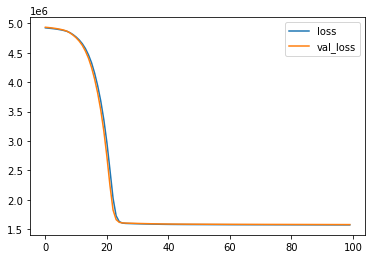

In [ ]:
from tensorflow import keras

model=keras.Sequential([keras.layers.Dense(10, activation='relu',input_shape=[10]),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(10, activation='relu'),
    keras.layers.Dense(1),
])


model.compile(
    optimizer='adam',
    loss='mae',
)

history = model.fit(
    x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=100000,
    epochs=100,
)


# Show the learning curves
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();